### Joshua Silva

In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
import sklearn.preprocessing as sp
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Seaborn uses a scipy.stats function which causes a future warning

## Data exploration and Cleaning the Features

### Get the feature data from the DB

In [3]:
conn = sqlite3.connect('project.db')
c = conn.cursor()

In [4]:
c.execute('SELECT * FROM molecule')
molecule_data = c.fetchall()

In [5]:
# Creating two Dataframes from the data
# This data frame will be the imputed and normalized data set used in the models
mol_df = pd.DataFrame(molecule_data,
                      columns = ['chirality', 'id','acd_logd', 'acd_logp', 'acd_most_apka',
                                 'acd_most_bpka', 'alogp', 'aromatic_rings','full_molformula',
                                 'full_mwt', 'hba', 'hbd', 'heavy_atoms', 'molecular_species',
                                 'qed_weighted'])

In [6]:
#Droping NA Values - to figure out outlier
mol_df2 = pd.DataFrame(molecule_data,
                      columns = ['chirality', 'id','acd_logd', 'acd_logp', 'acd_most_apka',
                                 'acd_most_bpka', 'alogp', 'aromatic_rings','full_molformula',
                                 'full_mwt', 'hba', 'hbd', 'heavy_atoms', 'molecular_species',
                                 'qed_weighted'])
mol_df2.dropna(inplace=True)
# stats,zscore drops na's from records - this will be used in the impouted and normalized df
z_scores = np.abs(stats.zscore(mol_df2.select_dtypes('float64')))
id_outliers = mol_df2.iloc[np.where(z_scores > 3)[0],]['id'].unique()

In [174]:
# removing the outlier records
mol_df = mol_df[~mol_df['id'].isin(id_outliers)]
# Impute Values based on column mean
mol_df.fillna(mol_df.mean(), inplace=True)
# Scale numeric columns with min max normalization
scaled = sp.MinMaxScaler().fit_transform(mol_df.select_dtypes('float64'))
for i in range(len(scaled[1])):
    mol_df[mol_df.select_dtypes('float64').columns[i]] = scaled[:,i]

### Start of visualizations - using mol_df, understanding the relationship before normalization
initial figures were created using the more raw data, but by updating the db, when figures were remade, normalized/imputed data was used
by reruning the the db_setup notebok, the nonnormalized figures can be created

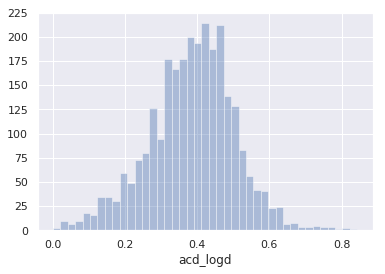

In [12]:
# Figures like this are of the distribution of the quantitative data, the variable shown is the value
# in quotes, ie in this figure 'acd_logd'
sns.set()
sns.distplot(mol_df2['acd_logd'], hist=True, kde=False)
plt.show()

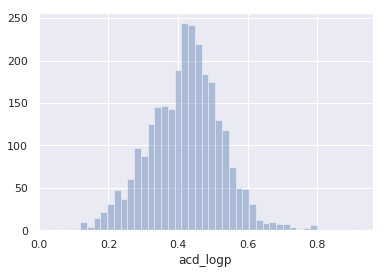

In [8]:
sns.distplot(mol_df2['acd_logp'], hist=True, kde=False)
plt.show()

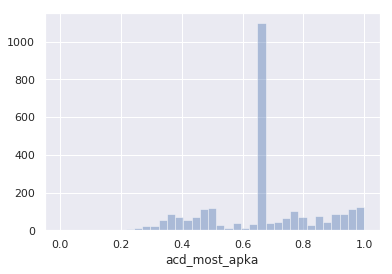

In [13]:
sns.distplot(mol_df2['acd_most_apka'], hist=True, kde=False)
plt.show()

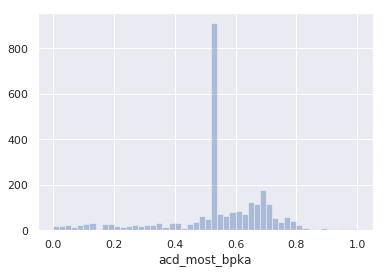

In [14]:
sns.distplot(mol_df2['acd_most_bpka'], hist=True, kde=False)
plt.show()

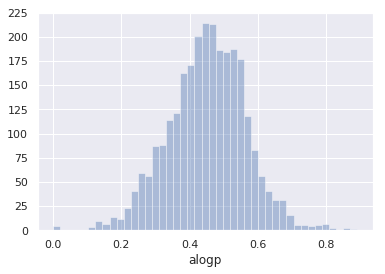

In [15]:
sns.distplot(mol_df2['alogp'], hist=True, kde=False)
plt.show()

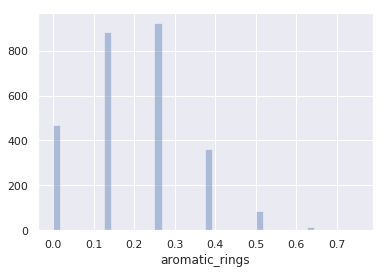

In [16]:
sns.distplot(mol_df2['aromatic_rings'], hist=True, kde=False)
plt.show()

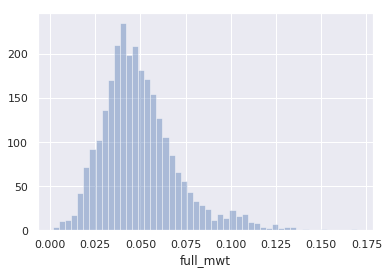

In [17]:
sns.distplot(mol_df2['full_mwt'], hist=True, kde=False)
plt.show()

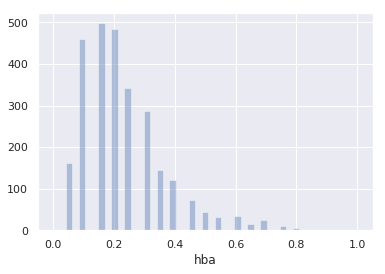

In [18]:
sns.distplot(mol_df2['hba'], hist=True, kde=False)
plt.show()

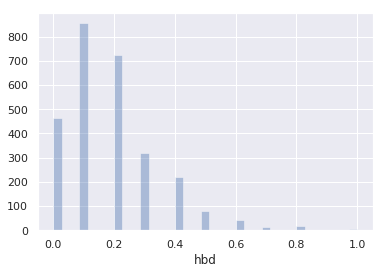

In [19]:
sns.distplot(mol_df2['hbd'], hist=True, kde=False)
plt.show()

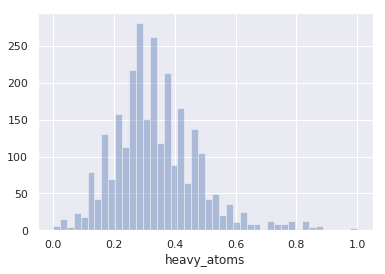

In [20]:
sns.distplot(mol_df2['heavy_atoms'], hist=True, kde=False)
plt.show()

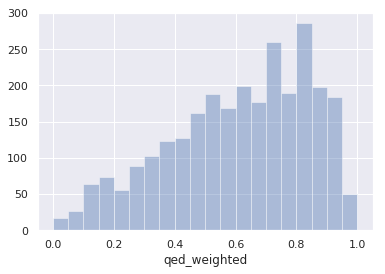

In [21]:
sns.distplot(mol_df2['qed_weighted'], hist=True, kde=False)
plt.show()

In [24]:
# Pair plots are used to show the relationship between the variables
# Each column / row is a different quantitative variable
# Scatter plots are create with histograms on the diagonal
sns.pairplot(mol_df2, x_vars=mol_df.select_dtypes('float64').columns,
            y_vars=mol_df.select_dtypes('float64').columns, height=10, kind='reg')
plt.show()
# Most relationships appear to not be correlated

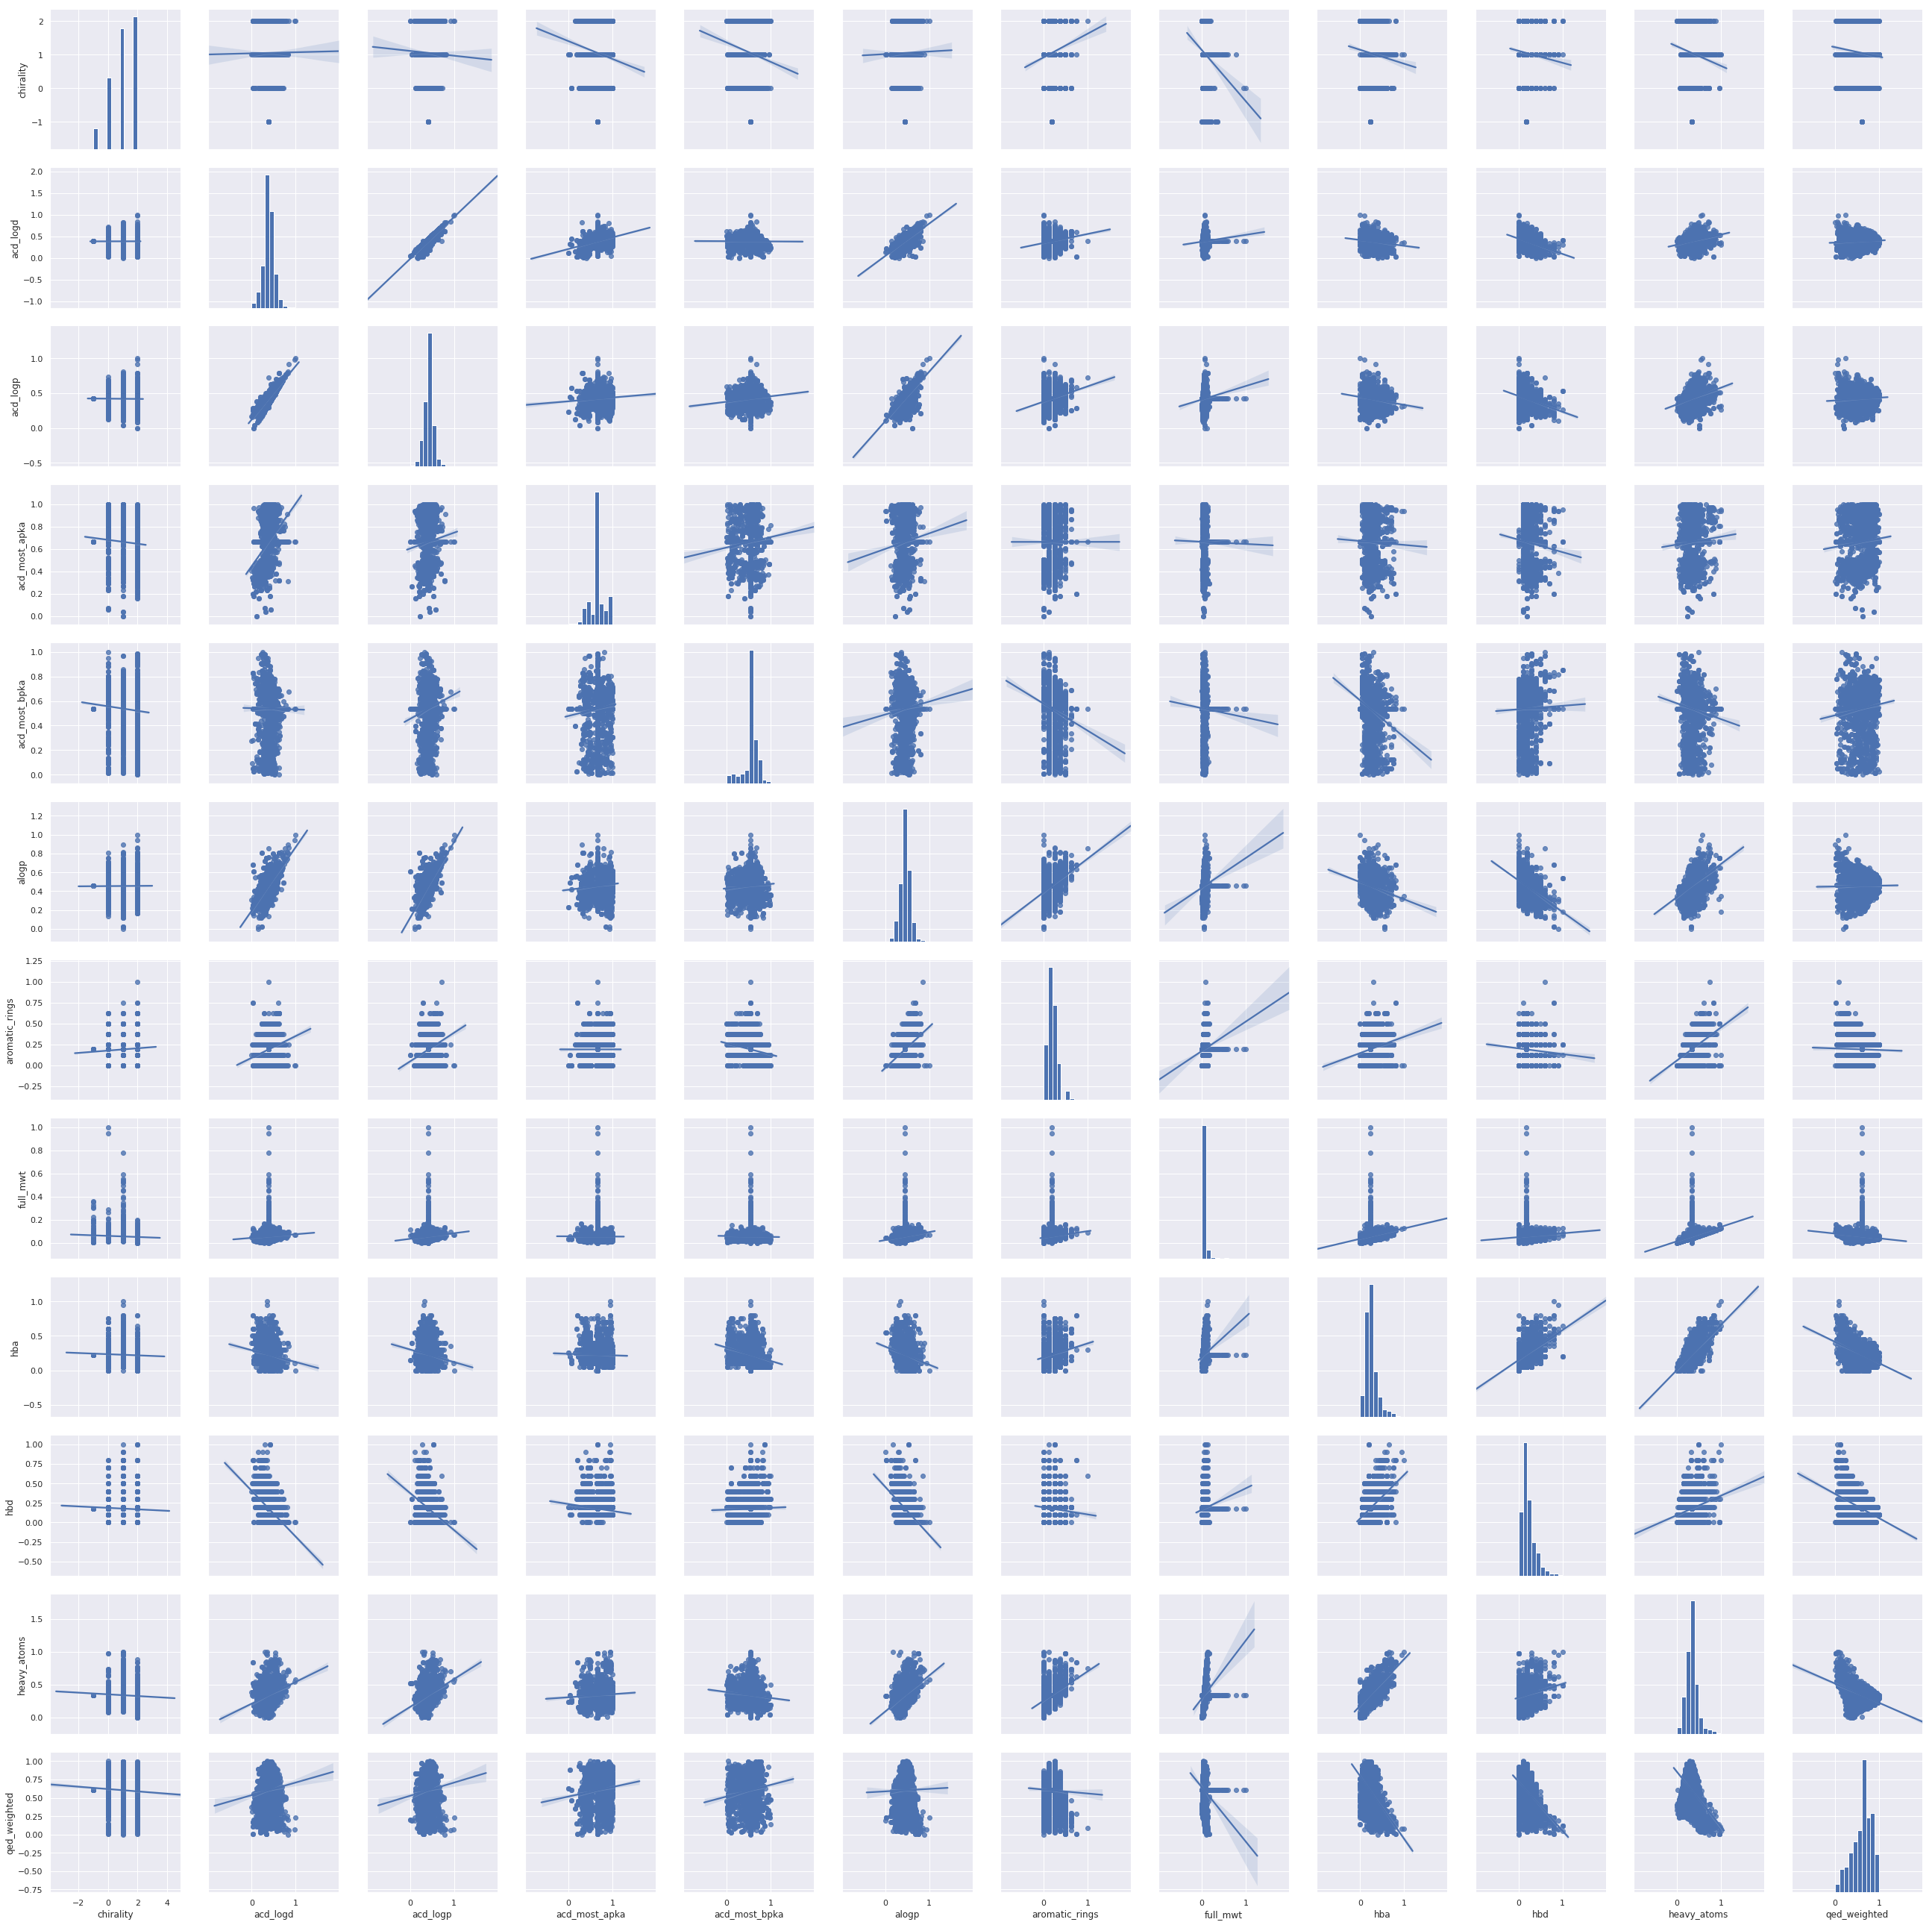

In [23]:
# Checking on the normalizaed data
sns.pairplot(mol_df, height=3, kind='reg')
plt.show()

In [177]:
# The correlation values for the numeric data sets
for i in mol_df.select_dtypes('float64').columns:
    for j in mol_df.select_dtypes('float64').columns:
        print([i, j, mol_df2[i].corr(mol_df2[j])])
# Strongest correlations between logd/logp features
# Medium Correlations between heavy atoms/hba/hbd and molecular wt
# Makes sense as the larger the drug the more of these features it can have
# Qed had and inverse relationship with features which were positively correlated with weight

['acd_logd', 'acd_logd', 1.0]
['acd_logd', 'acd_logp', 0.8906347251291941]
['acd_logd', 'acd_most_apka', 0.45763934332774076]
['acd_logd', 'acd_most_bpka', -0.045784054017383384]
['acd_logd', 'alogp', 0.7412802563746808]
['acd_logd', 'aromatic_rings', 0.4319762464500303]
['acd_logd', 'full_mwt', 0.13834697331585305]
['acd_logd', 'hba', -0.28438124328465714]
['acd_logd', 'hbd', -0.5460514977737233]
['acd_logd', 'heavy_atoms', 0.23190670491761128]
['acd_logd', 'qed_weighted', 0.1891156888440317]
['acd_logp', 'acd_logd', 0.8906347251291941]
['acd_logp', 'acd_logp', 1.0]
['acd_logp', 'acd_most_apka', 0.22921716427526734]
['acd_logp', 'acd_most_bpka', 0.0398622470759236]
['acd_logp', 'alogp', 0.7773970046084526]
['acd_logp', 'aromatic_rings', 0.4161959098334886]
['acd_logp', 'full_mwt', 0.21471266686353335]
['acd_logp', 'hba', -0.2670577618962994]
['acd_logp', 'hbd', -0.4568177245805637]
['acd_logp', 'heavy_atoms', 0.2870434667761791]
['acd_logp', 'qed_weighted', 0.12647505492456718]
['acd_

In [178]:
# Replacing the values in the database with the updated, imputed, normalized, no outlier set
c.execute('DELETE FROM molecule')
c.executemany('INSERT INTO molecule VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)', mol_df.values.tolist())
conn.commit()

In [179]:
conn.close()